<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Torch_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading audio file into pytorch's tensor objects and save Tensor objects into audio files

In [ ]:
import torch 
import torchaudio 

!pip install boto3

In [18]:
import io 
import os
import tarfile
import tempfile 
import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio 
from torchaudio.utils import download_asset

SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")


In [20]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)


AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [22]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


In [23]:
!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2

--2022-07-18 09:15:12--  https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
Resolving data.keithito.com (data.keithito.com)... 174.138.79.61
Connecting to data.keithito.com (data.keithito.com)|174.138.79.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2748572632 (2.6G) [application/octet-stream]
Saving to: ‘LJSpeech-1.1.tar.bz2’

LJSpeech-1.1.tar.bz 100%[===================>]   2.56G  42.7MB/s    in 62s     

2022-07-18 09:16:14 (42.4 MB/s) - ‘LJSpeech-1.1.tar.bz2’ saved [2748572632/2748572632]



In [ ]:
!tar -xvf /content/LJSpeech-1.1.tar.bz2

In [28]:
audio_sample = torchaudio.load("/content/LJSpeech-1.1/wavs/LJ001-0001.wav")
metadata_sample = torchaudio.info("/content/LJSpeech-1.1/wavs/LJ001-0001.wav")
print(metadata_sample)

AudioMetaData(sample_rate=22050, num_frames=212893, num_channels=1, bits_per_sample=16, encoding=PCM_S)


Querying File like objects

In [29]:
url = "https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.wav"
with requests.get(url,stream= True) as response:
  metadata = torchaudio.info(response.raw)
  print(metadata)

AudioMetaData(sample_rate=44100, num_frames=109368, num_channels=2, bits_per_sample=16, encoding=PCM_S)


In [55]:
path_audio = "/content/LJSpeech-1.1/wavs/LJ001-0001.wav"
waveform,sample_rate = torchaudio.load(path_audio)

def plot_waveform(waveform,samplerate):
  waveform = waveform.numpy()
  num_channels,num_frames = waveform.shape  
  time_axis = torch.arange(0,num_frames)/sample_rate
  figure,axes = plt.subplots(num_channels,1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels,1):
    axes[c].plot(time_axis, waveform[c],linewidth=1)
    axes[c].grid(True)
    if num_channels >1:
      axes[c].set_ylabel(f"channel {c+1}")
  figure.suptitle("waveform")
  plt.show(block=False)

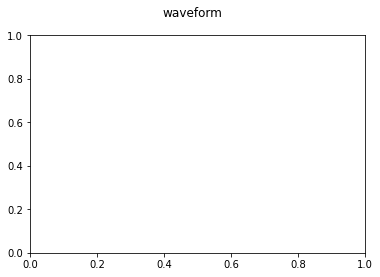

In [56]:
plot_waveform(waveform,sample_rate)

In [45]:
wav = waveform.numpy()
wav.shape

(1, 212893)